In [1]:
# Importar as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importar o arquivo CSV

vale3_df = pd.read_csv('VALE3.csv')

In [3]:
# Criar novo dataframe com as colunas de Data e Fechamento

vale3_resumo = vale3_df[['DATA','FECHAMENTO']].copy()
vale3_resumo.columns = ['Data','Fechamento']

# Substituir as víruglas por pontos na coluna Fechamento

vale3_resumo['Fechamento'] = vale3_resumo['Fechamento'].str.replace(',','.').astype(float)

In [5]:
# Expotar o dataframe para um novo arquivo CSV

vale3_resumo.to_csv('VALE3_RESUMO.csv', index=False)

In [6]:
# 1. Preço médio dos papéis no período

preco_medio = vale3_resumo['Fechamento'].mean()
print(f'1. Preço médio das ações: R$ {preco_medio:.2f}')

1. Preço médio das ações: R$ 70.34


In [8]:
# 2. Preços máximo e mínimo

preco_maximo = vale3_resumo['Fechamento'].max()
data_maximo = vale3_resumo.loc[vale3_resumo['Fechamento'].idxmax(),'Data']

preco_minimo = vale3_resumo['Fechamento'].min()
data_minimo = vale3_resumo.loc[vale3_resumo['Fechamento'].idxmin(),'Data']

# Mostrar  os valores

print(f'2. Preço máximo de R$ {preco_maximo:.2f} no dia {data_maximo}')
print(f'2. Preço minimo de R$ {preco_minimo:.2f} no dia {data_minimo}')


2. Preço máximo de R$ 77.40 no dia 27/12/2023
2. Preço minimo de R$ 60.78 no dia 23/10/2023


In [9]:
# Valor dos papéis no dia 70 e lucro ou prejuízo no momento
acoes_adquiridas = 2000

data_aquisicao = vale3_resumo.iloc[9]['Data']
preco_aquisicao = vale3_resumo.iloc[9]['Fechamento']

data_venda = vale3_resumo.iloc[69]['Data']
preco_venda = vale3_resumo.iloc[69]['Fechamento']

valor_investido = acoes_adquiridas * preco_aquisicao
valor_venda = acoes_adquiridas * preco_venda

lucro_prejuizo = valor_venda - valor_investido

print(f'3. Valor total das ações no dia 70: R$ {valor_venda:.2f}')
print(f'O investidor teve {"lucro" if lucro_prejuizo > 0 else "prejuízo"} de R$ {abs(lucro_prejuizo):.2f}')

3. Valor total das ações no dia 70: R$ 143100.00
O investidor teve lucro de R$ 12340.00


<function matplotlib.pyplot.show(close=None, block=None)>

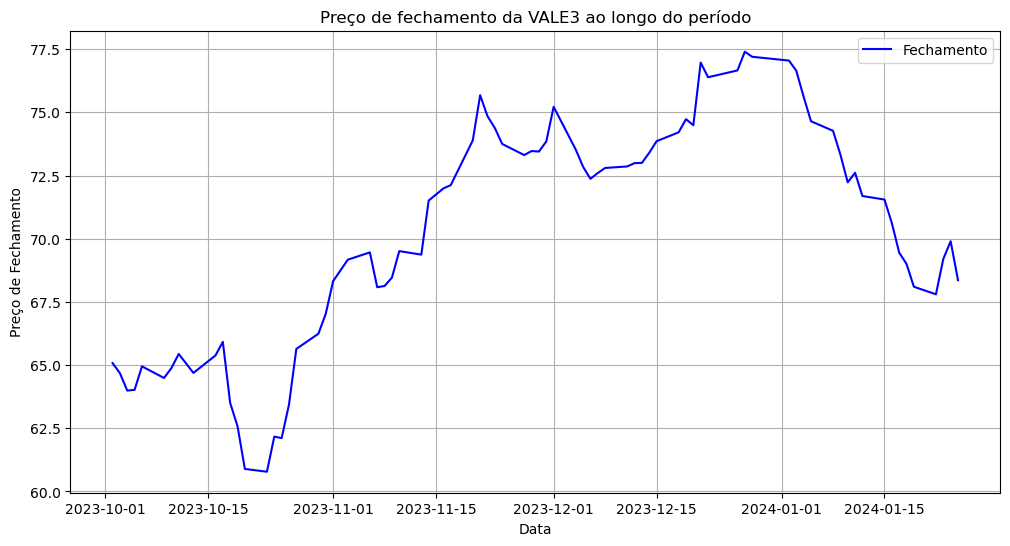

In [11]:
# Gŕafico de evolução dos preços

# Converter a coluna Data para formato datetime
vale3_resumo['Data'] = pd.to_datetime(vale3_resumo['Data'], format="%d/%m/%Y")

# Criar gráfico

plt.figure(figsize=(12,6))
plt.plot(vale3_resumo['Data'], vale3_resumo['Fechamento'], label='Fechamento', color='blue')
plt.title("Preço de fechamento da VALE3 ao longo do período")
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show